# Corn classification

In [36]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [37]:
training_images=glob('C:/Users/BIBER/Desktop/kaggle-pog-series-s01e03/corn/train/*.png')
train_csv=pd.read_csv('C:/Users/BIBER/Desktop/kaggle-pog-series-s01e03/corn/train.csv')
test_images=glob('C:/Users/BIBER/Desktop/kaggle-pog-series-s01e03/corn/test/*.png')
test_csv=pd.read_csv('C:/Users/BIBER/Desktop/kaggle-pog-series-s01e03/corn/test.csv')

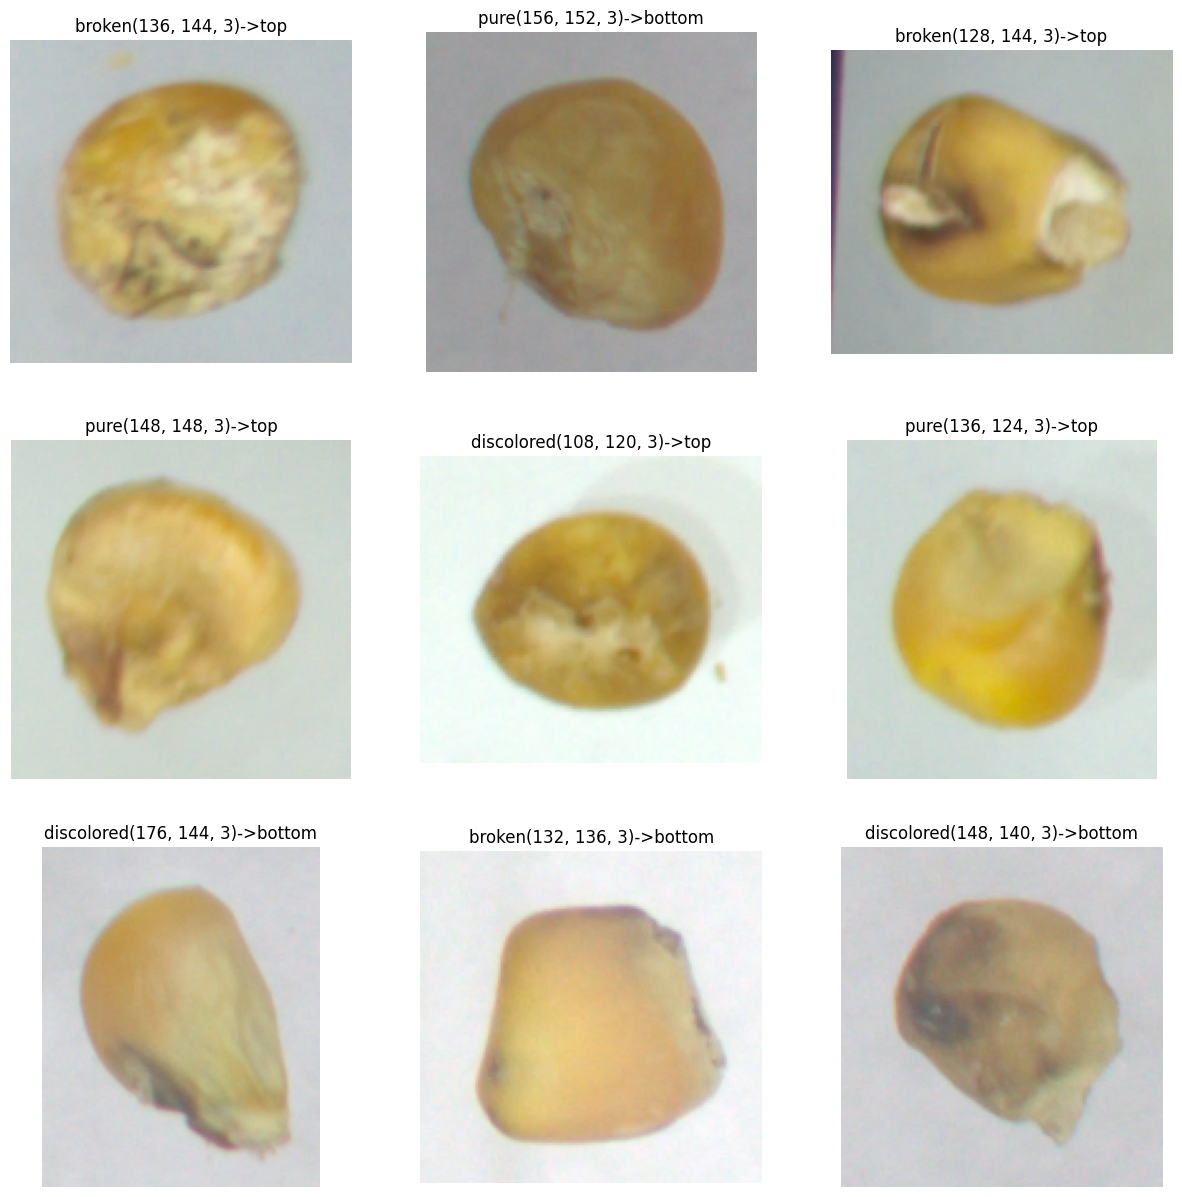

In [38]:
fig,axs=plt.subplots(3,3,figsize=(15, 15))
axs=axs.flatten()
for i in range(9):
    img=plt.imread(training_images[i])
    axs[i].axis('off')
    axs[i].set_title(train_csv.label[i]+str(img.shape)+'->'+train_csv.view[i])
    axs[i].imshow(img)

In [39]:
train_csv.groupby(['label','view']).count().unstack()

seed_id        image      
view        bottom   top bottom   top
label                                
broken        2018  2536   2018  2536
discolored    1246  1258   1246  1258
pure          3167  2670   3167  2670
silkcut        688   739    688   739

In [40]:
import cv2

def resize_data(training_images):
    train_data=[]
    for i,path in enumerate(training_images):
        img=cv2.imread(path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(224,224))
        train_data.append(img)
    return train_data
train_data=resize_data(training_images)

KeyboardInterrupt: 

In [ ]:
label_map={'pure':0,'broken':1,'discolored':2,'silkcut':3}
train_csv.label=train_csv.label.map(label_map)

In [ ]:
import numpy as np
train_data=np.array(train_data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout

model=Sequential(
[
    Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(224,224,3,)),
    MaxPool2D(2,2),
    
    Flatten(),
    Dense(500,activation='relu'),
    Dropout(0.5),
    Dense(100,activation='relu'),
    Dropout(0.3),
    Dense(20,activation='relu'),
    Dense(4,activation='softmax')
]
)

model.compile(
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_4 (Dense)             (None, 500)               197136500 
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                      

In [ ]:
X=train_data
y=np.array(train_csv.label)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.1)

In [ ]:
history=model.fit(x=X_train,y=y_train,batch_size=32,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
 64/403 [===>..........................] - ETA: 57:19 - loss: 1127.0688 - acc: 0.2910

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend();

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
test_data=np.array(resize_data(test_images))

In [ ]:
test_data.shape

In [ ]:
preds=model.predict(test_data)

In [ ]:
labels=[np.argmax(pred) for pred in preds]

In [ ]:
results=pd.DataFrame()
results['seed_id']=test_csv.seed_id.tolist()
results['label']=labels
results.head()

In [ ]:
inv_map = {v: k for k, v in label_map.items()}
results.label=results.label.map(inv_map)
results.head()

In [ ]:
results.to_csv('submission.csv',index=False)